# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

Next task: Now it’s time to work on predicting the taxi fare amounts.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [1]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
import datetime as dt

# Packages for OLS, MLR, confusion matrix
# import statsmodels.api as sn
# from statsmodels.formula.api import ols

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [2]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


    Some purpose of EDA:
    - get familiar with dataset (types, size, labels)
    - Understanding which variables are present in the data
    - Reviewing the distribution of features, such as minimum, mean, and maximum values
    - check requirement for any initial data transfornation or reshaping and make such transformation
    - check for missing data and deal with it
    - check for outliers and deal with it
    - Plotting the relationship between the independent and dependent variables to visualize which feature is the best choice for X

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [3]:
# Start with `.shape` and `.info()`
print(df0.info())
print(df0.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [4]:
# Check for duplicates
df0.isna().drop_duplicates()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
# Check for missing data
df0.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Use `.describe()`.

In [6]:
# Use .describe()
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [7]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Task 2b. Convert pickup & dropoff columns to datetime


In [8]:
# Check the format of the data
df0.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [9]:
# Convert datetime columns to datetime
df = df0.drop_duplicates()
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df.dtypes

Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [10]:
# Create `duration` column
df["duration"] = (df["tpep_dropoff_datetime"] - df["tpep_pickup_datetime"])
df["duration"] = df["duration"].map(lambda x: x.total_seconds() / 60)
df["duration"].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

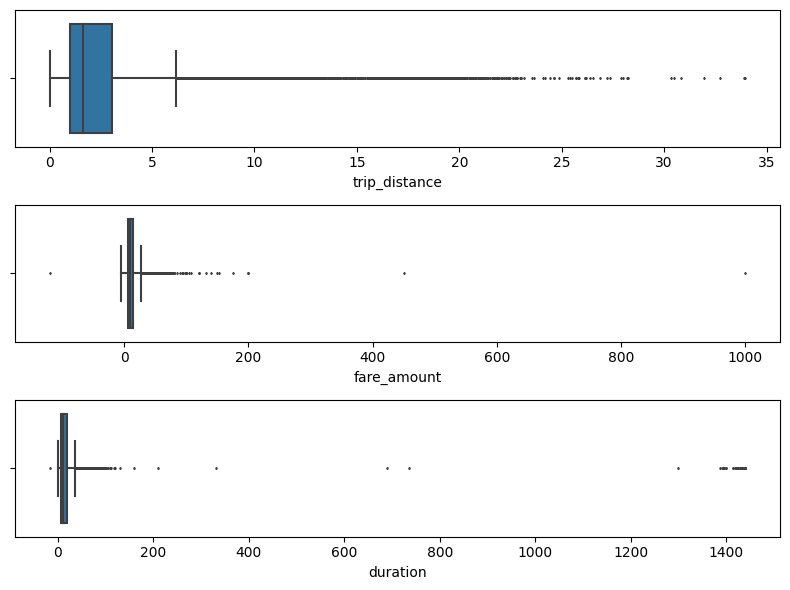

In [15]:
# Create box plot for "trip_distance", "fare_amount" and "duration"
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,6))

sns.boxplot(data=None, x=df["trip_distance"], fliersize=1, ax=ax1)
sns.boxplot(data=None, x=df["fare_amount"], fliersize=1, ax=ax2)
sns.boxplot(data=None, x=df["duration"], fliersize=1, ax=ax3)
plt.tight_layout()
plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

    1) All othe three variables contain outliers.    
    2) Trip distance equial 0 (zero) seems unbelievanle. Outliers more tan 30 miles also leave place for doubts   
    3) Negative fare amount as well as more than 400$ seems not fare. Duration trip around 1400 min (~24 hours) on taxy seems unrealistic. Negative duration is also not real

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [16]:
sorted(set(df['trip_distance']))[:10] # this is what was required!!!!

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [17]:
# Calculate the count of rides where the `trip_distance` is zero.
df[df["trip_distance"] == 0].shape[0]

148

#### `fare_amount` outliers

In [18]:
df["fare_amount"].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

    There are some negative values in the dataset which cannot be correct

In [19]:
# Impute values less than $0 with 0
df["fare_amount"] = df["fare_amount"].map(lambda x: 0 if x < 0 else x)

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [20]:
# Reassign minimum to zero
lower_limit = 0

# Calculate upper threshold
percentile25 = df["fare_amount"].quantile(0.25)
percentile75 = df["fare_amount"].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 6 * iqr

# Reassign values > threshold to threshold
df["fare_amount"] = df["fare_amount"].map(lambda x: upper_limit if x > upper_limit else x)
df["fare_amount"].describe()

count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64

#### `duration` outliers


In [21]:
# Call .describe() for duration outliers
df["duration"].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [22]:
# Impute a 0 for any negative values
df["duration"] = df["duration"].map(lambda x: 0 if x < 0 else x)

In [23]:
# Impute the high outliers
lower_limit = 0

# Calculate upper threshold
percentile25 = df["duration"].quantile(0.25)
percentile75 = df["duration"].quantile(0.75)
iqr = percentile75 - percentile25
upper_limit = percentile75 + 6 * iqr

# Reassign values > threshold to threshold
df["duration"] = df["duration"].map(lambda x: upper_limit if x > upper_limit else x)
df["duration"].describe()

count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64

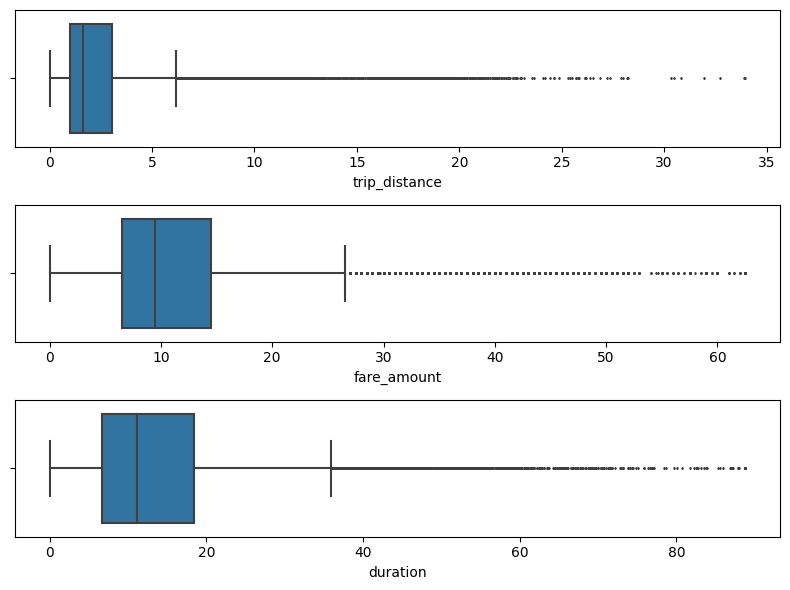

In [24]:
# Create box plot for "trip_distance", "fare_amount" and "duration"
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(8,6))

sns.boxplot(data=None, x=df["trip_distance"], fliersize=1, ax=ax1)
sns.boxplot(data=None, x=df["fare_amount"], fliersize=1, ax=ax2)
sns.boxplot(data=None, x=df["duration"], fliersize=1, ax=ax3)
plt.tight_layout()
plt.show()

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

In [25]:
df[["PULocationID", "DOLocationID"]].head()

,PULocationID,DOLocationID
0,100,231
1,186,43
2,262,236
3,188,97
4,4,112


In [26]:
# Create `pickup_dropoff` column
df["pickup_dropoff"] = df["PULocationID"].map(lambda x: str(x)) + " " + df["DOLocationID"].map(lambda x: str(x))
df["pickup_dropoff"].head()

0    100 231
1     186 43
2    262 236
3     188 97
4      4 112
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [27]:
grouped = df.groupby("pickup_dropoff").mean(numeric_only=True)[["trip_distance", "duration"]]
grouped.head()

,trip_distance,duration
pickup_dropoff,,
1 1,2.433333,0.466667
10 148,15.700000,69.366667
100 1,16.890000,48.183333
100 100,0.253333,3.130556
100 107,1.180000,11.200000


`grouped` is an object of the `DataFrame` class.

Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

In [28]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()


# 2. Reassign to only contain the inner dictionary
grouped_dict_1 = grouped_dict["trip_distance"]

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.

In [29]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df["mean_distance"] = df["pickup_dropoff"]

# 2. Map `grouped_dict` to the `mean_distance` column
df["mean_distance"] = df["mean_distance"].map(lambda x: grouped_dict_1[x])

# Confirm that it worked
df["mean_distance"].head()

0    3.521667
1    3.108889
2    0.881429
3    3.700000
4    4.435000
Name: mean_distance, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [30]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
grouped_dict_2 = grouped_dict["duration"]
# mean trip duration for all trips with those pickup_dropoff combos
df["mean_duration"] = df["pickup_dropoff"]
df["mean_duration"] = df["mean_duration"].map(lambda x: grouped_dict_2[x])

# Confirm that it worked
df["mean_duration"].head()

0    22.847222
1    24.470370
2     7.250000
3    30.250000
4    14.616667
Name: mean_duration, dtype: float64

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [31]:
# Create 'day' col
df["day"] = df["tpep_pickup_datetime"].dt.day_name()

# Create 'month' col
df["month"] = df["tpep_pickup_datetime"].dt.month_name()

df[["day", "month"]].head()

,day,month
0,Saturday,March
1,Tuesday,April
2,Friday,December
3,Sunday,May
4,Saturday,April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [32]:
# Create 'rush_hour' col
df["rush_hour"] = df["tpep_pickup_datetime"]
df["rush_hour"] = df["rush_hour"].map(lambda x: 1 if (x.hour > 6 & x.hour < 10) | (x.hour > 16 & x.hour < 20) else 0)

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df.loc[df["day"].isin(["Saturday", "Sunday"]), "rush_hour"] = 0

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

Text(0.5, 1.0, 'Scatterplot for mean duration and fare amount')

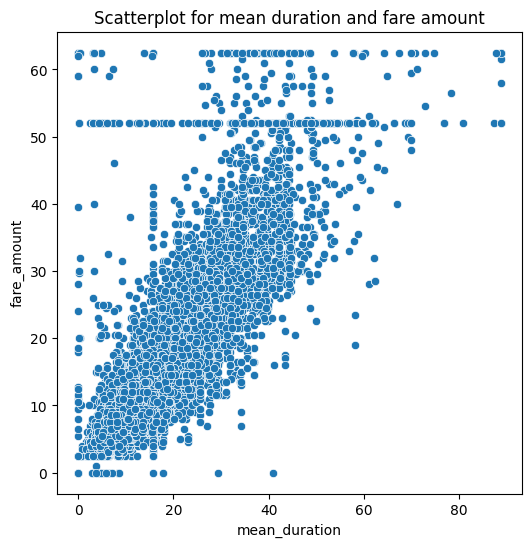

In [33]:
# Create a scatterplot to visualize the relationship between variables of interest
plt.figure(figsize=(6,6))
sns.scatterplot(x=df["mean_duration"], y=df["fare_amount"])
plt.title("Scatterplot for mean duration and fare amount");

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [34]:
df[(df["fare_amount"] > 50) & (df["fare_amount"] < 52.5)]["fare_amount"].value_counts()

fare_amount
52.0    514
50.5      9
51.0      7
51.5      6
Name: count, dtype: int64

Examine the first 30 of these trips.

In [36]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None) # this should be put in the sell which we want to dysplay full amount of colums
df[df["fare_amount"] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236 132,19.211667,40.500000,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132 132,2.255862,3.021839,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wednesday,December,1
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,39.833333,132 48,18.761905,58.246032,Tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Monday,June,1
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,45.450000,132 48,18.761905,58.246032,Thursday,August,1
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tuesday,September,1
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sunday,April,0


**Question:** What do you notice about the first 30 trips?

    RatecodeID == 2    
    store_and_fwd_flag == N    
    improvement_surcharge == 0.3

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [162]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'duration',
       'pickup_dropoff', 'mean_distance', 'mean_duration', 'day', 'month',
       'rush_hour'],
      dtype='object')

In [37]:
df1 = df[['VendorID', 'passenger_count', 'trip_distance',
       'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'duration',
       'mean_distance', 'mean_duration','rush_hour']]
df2 = df[['fare_amount', 'mean_distance', 'mean_duration']]
df2.head()

,fare_amount,mean_distance,mean_duration
0,13.0,3.521667,22.847222
1,16.0,3.108889,24.470370
2,6.5,0.881429,7.250000
3,20.5,3.700000,30.250000
4,16.5,4.435000,14.616667


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

<Figure size 900x900 with 0 Axes>

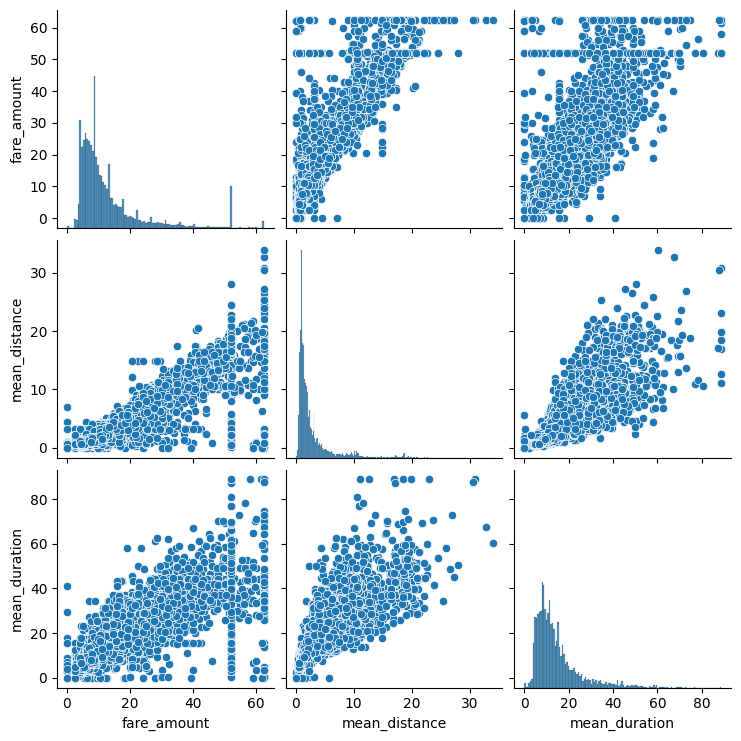

In [38]:
# Create a pairplot to visualize pairwise relationships between variables in the data
plt.figure(figsize=(9,9))
sns.pairplot(df2)
plt.show();

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [39]:
# Correlation matrix to help determine most correlated variables
corr_matrix = df2.corr()
print(corr_matrix)

               fare_amount  mean_distance  mean_duration
fare_amount       1.000000       0.910185       0.859105
mean_distance     0.910185       1.000000       0.874864
mean_duration     0.859105       0.874864       1.000000


    Pearson correlation coefficient (PCC)
    0 - no correlation
    -1 and 1 - good correlation

In [40]:
df1.corr()["duration"]

VendorID                 0.004699
passenger_count          0.016757
trip_distance            0.759608
RatecodeID               0.088728
PULocationID            -0.062816
DOLocationID            -0.074137
payment_type            -0.038604
fare_amount              0.831036
extra                    0.097877
mta_tax                 -0.030109
tip_amount               0.422089
tolls_amount             0.439907
improvement_surcharge    0.015336
duration                 1.000000
mean_distance            0.738210
mean_duration            0.843800
rush_hour                0.054897
Name: duration, dtype: float64

In [42]:
df1.corr()["fare_amount"]

VendorID                 0.001045
passenger_count          0.014942
trip_distance            0.924626
RatecodeID               0.222102
PULocationID            -0.072600
DOLocationID            -0.088849
payment_type            -0.049516
fare_amount              1.000000
extra                    0.097632
mta_tax                 -0.141438
tip_amount               0.542246
tolls_amount             0.616719
improvement_surcharge    0.029979
duration                 0.831036
mean_distance            0.910185
mean_duration            0.859105
rush_hour                0.007635
Name: fare_amount, dtype: float64

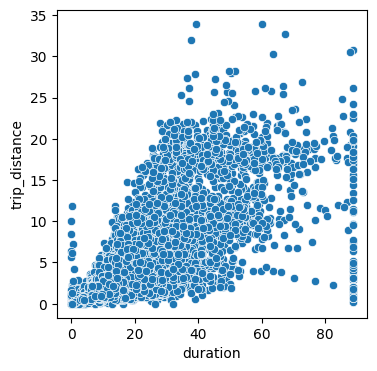

In [43]:
plt.figure(figsize=(4,4))
sns.scatterplot(x=df1["duration"], y=df1["trip_distance"]);

Visualize a correlation heatmap of the data.

In [44]:
df3 = df1.drop(["passenger_count", "PULocationID", "DOLocationID", "extra", "tip_amount",\
                "tolls_amount", "duration", "trip_distance"], axis=1)
df3.head()

,VendorID,RatecodeID,payment_type,fare_amount,mta_tax,improvement_surcharge,mean_distance,mean_duration,rush_hour
0,2,1,1,13.0,0.5,0.3,3.521667,22.847222,0
1,1,1,1,16.0,0.5,0.3,3.108889,24.470370,1
2,1,1,1,6.5,0.5,0.3,0.881429,7.250000,1
3,2,1,1,20.5,0.5,0.3,3.700000,30.250000,0
4,2,1,2,16.5,0.5,0.3,4.435000,14.616667,0


In [45]:
df3["RatecodeID"].replace({99:6}, inplace=True)
df3["RatecodeID"].unique()

array([1, 2, 5, 3, 4, 6], dtype=int64)

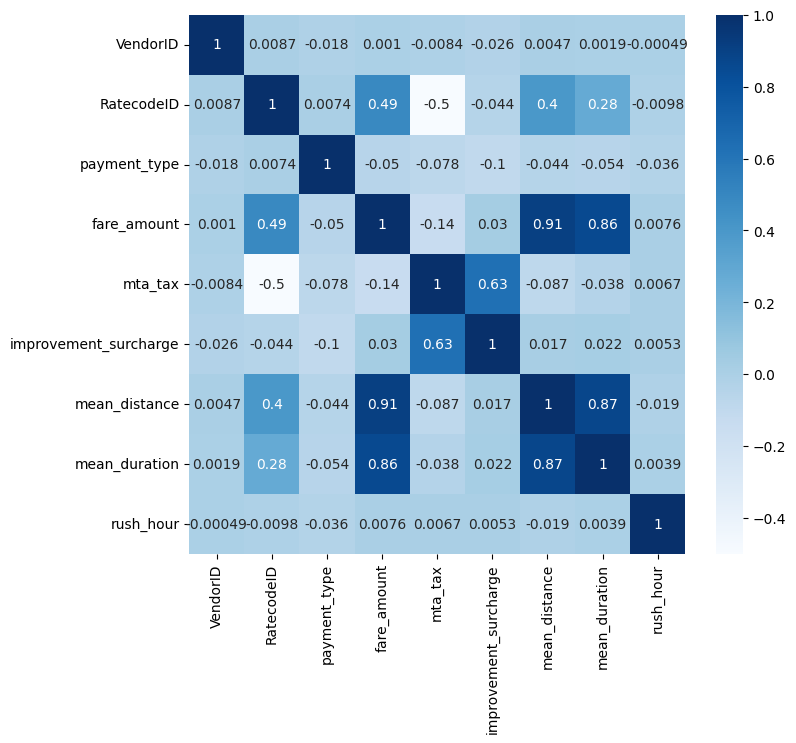

In [46]:
# Create correlation heatmap
plt.figure(figsize = (8,7))
ax = sns.heatmap(df3.corr(), cmap = 'Blues', annot=True)
colorbar = ax.collections[0].colorbar
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

    The following variables highly correlated with target variable "Fare amount": "mean duration" and  "mean distance"

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [47]:
# Remove the target column from the features
X = df3.drop(columns='fare_amount')

# Set y variable
y = df3["fare_amount"]

# Display first few rows
X.head()

,VendorID,RatecodeID,payment_type,mta_tax,improvement_surcharge,mean_distance,mean_duration,rush_hour
0,2,1,1,0.5,0.3,3.521667,22.847222,0
1,1,1,1,0.5,0.3,3.108889,24.470370,1
2,1,1,1,0.5,0.3,0.881429,7.250000,1
3,2,1,1,0.5,0.3,3.700000,30.250000,0
4,2,1,2,0.5,0.3,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [116]:
# Convert VendorID to string
X["VendorID"] = X["VendorID"].astype(str)

# Get dummies
X["VendorID"] = pd.get_dummies(X["VendorID"], drop_first=True, dtype=int)
X.head()

,VendorID,RatecodeID,payment_type,mta_tax,improvement_surcharge,mean_distance,mean_duration,rush_hour
0,1,1,1,0.5,0.3,3.521667,22.847222,0
1,0,1,1,0.5,0.3,3.108889,24.470370,1
2,0,1,1,0.5,0.3,0.881429,7.250000,1
3,1,1,1,0.5,0.3,3.700000,30.250000,0
4,1,1,2,0.5,0.3,4.435000,14.616667,0


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [49]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [50]:
# Standardize the X variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


### Fit the model

Instantiate your model and fit it to the training data.

In [51]:
# Fit your model to the training data
model = LinearRegression().fit(X_train_scaled, y_train)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [64]:
# Evaluate the model performance on the training data
y_pred = model.predict(X_train_scaled)
# r_sq = lr.score(X_train_scaled, y_train)
print("Model statistic. Train data")
print(f"R_squared: {metrics.r2_score(y_train, y_pred):.4f}");
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_train, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {metrics.mean_squared_error(y_train, y_pred, squared=True):.2f}")
print(f"Root Mean Squared Error (RMSE): {metrics.mean_squared_error(y_train, y_pred, squared=False):.2f}")


Model statistic. Train data
R_squared: 0.8686
Mean Absolute Error (MAE): 2.20
Mean Squared Error (MSE): 14.68
Root Mean Squared Error (RMSE): 3.83


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [60]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [66]:
# Evaluate the model performance on the testing data
y_pred = model.predict(X_test_scaled)
print("Model statistic. Test data")
print(f"R_squared: {metrics.r2_score(y_test, y_pred):.4f}");
print(f"Mean Absolute Error (MAE): {metrics.mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error (MSE): {metrics.mean_squared_error(y_test, y_pred, squared=True):.2f}")
print(f"Root Mean Squared Error (RMSE): {metrics.mean_squared_error(y_test, y_pred, squared=False):.2f}")

Model statistic. Test data
R_squared: 0.8839
Mean Absolute Error (MAE): 2.17
Mean Squared Error (MSE): 12.63
Root Mean Squared Error (RMSE): 3.55


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [82]:
# Create a `results` dataframe
columns = ["actual", "predicted", "residuals"]
result = pd.concat([y_test.reset_index(drop=True), pd.Series(y_pred), (y_test - y_pred).reset_index(drop=True)], axis=1)
result.columns =columns
result

,actual,predicted,residuals
0,14.0,11.891082,2.108918
1,28.0,16.402737,11.597263
2,5.5,7.016722,-1.516722
3,15.5,15.541512,-0.041512
4,9.5,10.590268,-1.090268
...,...,...,...
4535,21.5,19.891021,1.608979
4536,5.5,5.707351,-0.207351
4537,9.0,6.881982,2.118018
4538,7.0,6.905443,0.094557


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

Text(0.5, 1.0, 'Scatterplot Predicted over Actual')

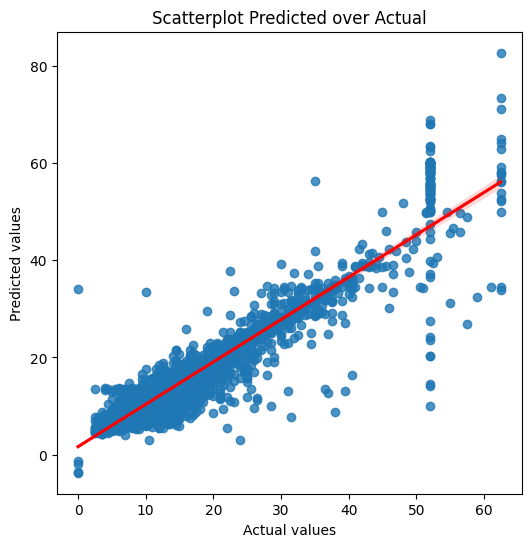

In [86]:
# Create a scatterplot to visualize `predicted` over `actual`
plt.figure(figsize=(6,6))
sns.regplot(data=result, x="actual", y="predicted", line_kws={'color':'red'})
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatterplot Predicted over Actual")

Visualize the distribution of the `residuals` using a histogram.

In [88]:
import statsmodels.api as sm

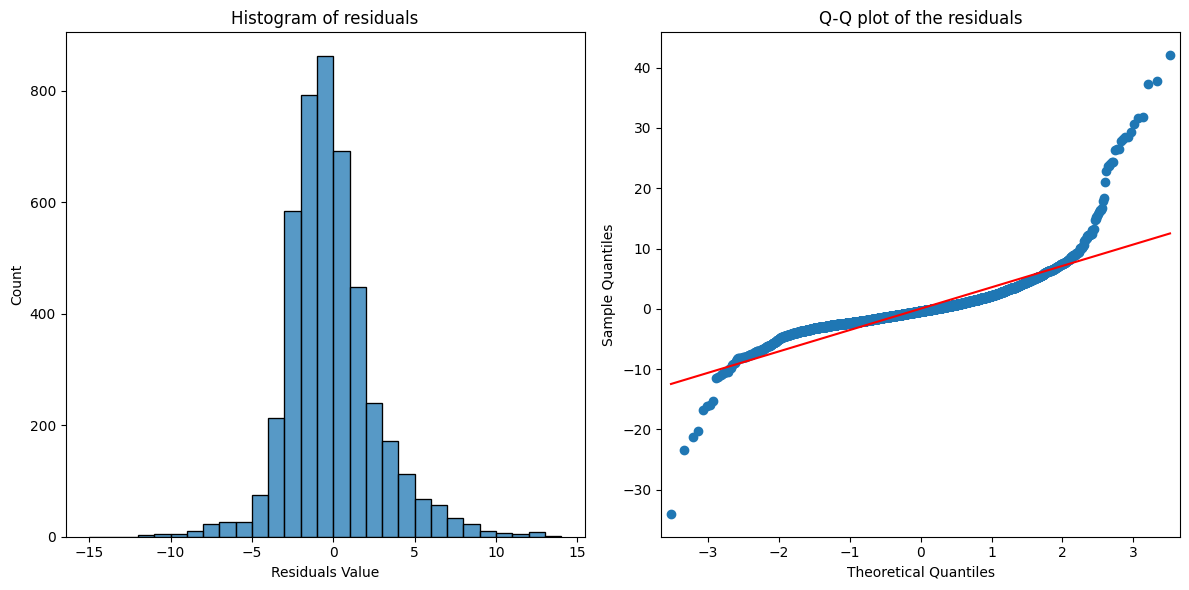

In [90]:
# Visualize the distribution of the `residuals`
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
sns.histplot(result["residuals"], bins=range(-15,15,1), ax=ax1)
ax1.set_xlabel("Residuals Value")
ax1.set_title("Histogram of residuals")
sm.qqplot(result["residuals"], line="s", ax=ax2)
ax2.set_title("Q-Q plot of the residuals")
plt.tight_layout()
plt.show();

In [91]:
# Calculate residual mean
result["residuals"].mean()

0.012724701487424777

Create a scatterplot of `residuals` over `predicted`.

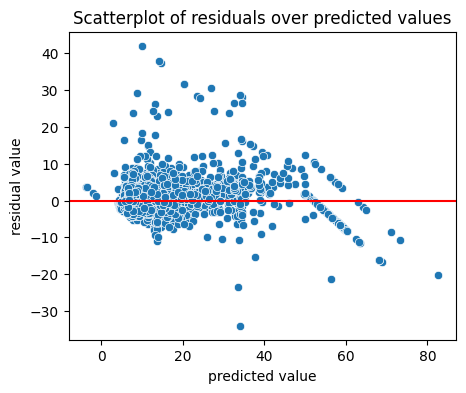

In [100]:
# Create a scatterplot of `residuals` over `predicted`
plt.figure(figsize=(5,4))
sns.scatterplot(data=result, x='predicted', y='residuals');
plt.axhline(0, c='red');
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [114]:
# Output the model's coefficients
coeficients = pd.DataFrame(model.coef_, index=X.columns)
coeficients.rename(columns={0: "coeficients"}, inplace=True)
coeficients

,coeficients
VendorID,-0.055116
RatecodeID,1.905521
payment_type,-0.076115
mta_tax,-0.109263
improvement_surcharge,0.300098
mean_distance,5.882997
mean_duration,3.363744
rush_hour,0.189950


What do these coefficients mean? How should they be interpreted?

    The meaning of the coefficient are that if all other parameters assumed to be fixed that increasing the value of the independent variable X will lead to increasing (if coefficient is > 0) or decreasing (if coefficient < 0) the value of independent value Y (in our case "fare amount")

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?

        We need thorothully analys independent variables and understand if we can use this variables or not. We cannot use      
        variables which will be unaccesible when we will predict data (variable which will be known after the trip is over
        and not before). It can lead to decreasing model performance but it will be working model and not theoretical one!!!


2. What results can be presented from this notebook?
        
        With keeping all other parameters the same, the increasing mean trip duration on 1 minute will lead to increasing
        fare amount by 3.36$, meanwile if we keep all other parameters and increase mean distance by 1 mile, the fare cost
        will increase by 5.88$
        
        Regarding categorical variables: - not valid!!!!

R_squared: 0.8839 which is quit good achievement. This model is quite solid in prediction "fare amount"


    If you did not convert a categorical variable with multiple categories into one-hot encoding or use some other appropriate encoding method, it can affect the interpretation of the linear regression coefficients and the overall model performance.

    When you have a categorical variable with more than two categories and you use it as-is (without one-hot encoding or similar techniques), the linear regression model will treat it as an ordinal variable, assuming a linear relationship between the categories. This may not accurately represent the underlying relationships in your data, and the coefficients may not have meaningful interpretations.

    In practice, one-hot encoding (creating dummy variables) is a common and recommended approach for handling categorical variables with multiple categories in linear regression. One-hot encoding allows each category to have its own coefficient, which provides a more flexible and interpretable representation of the relationships between the categories and the dependent variable.